In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib
!pip install keras
!pip install openpyxl
!pip install tensorflow
!pip install ipympl
from ipywidgets import *
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
print('All Needed Packages Installed')

2022-05-11 20:05:16.111242: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-11 20:05:16.111306: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


All Needed Packages Installed


In [2]:
loadData = pd.read_excel('MISO_Central_Load.xlsx')
loadData.head()


,DTTM,Forecast,Actual
0,2017-01-01 01:00:00,33932,33851.44
1,2017-01-01 02:00:00,33806,33072.33
2,2017-01-01 03:00:00,33645,32415.59
3,2017-01-01 04:00:00,33417,32088.82
4,2017-01-01 05:00:00,33527,32108.70


In [3]:
loadData.describe()

,Forecast,Actual
count,26279.000000,26279.000000
mean,39968.864493,39591.571482
std,6488.516953,6523.880196
min,26867.000000,26475.450000
25%,35397.000000,34883.060000
50%,39113.000000,38789.620000
75%,43330.500000,43131.455000
max,91034.000000,65537.790000


In [4]:
features = pd.DataFrame([])
features['dttm'] = loadData.DTTM
features['hour'] = loadData.DTTM.dt.hour
features['dayOfYear'] = loadData.DTTM.dt.dayofyear
features['dayOfWeek'] = loadData.DTTM.dt.dayofweek
features.head()


,dttm,hour,dayOfYear,dayOfWeek
0,2017-01-01 01:00:00,1,1,6
1,2017-01-01 02:00:00,2,1,6
2,2017-01-01 03:00:00,3,1,6
3,2017-01-01 04:00:00,4,1,6
4,2017-01-01 05:00:00,5,1,6


In [5]:
model = RandomForestRegressor(n_estimators = 100)
# model = LinearRegression()
# model = SVR()
# model = Sequential()
# model.add(Dense(20, input_dim = len(features.columns), activation = 'relu'))
# model.add(Dense(20, activation = 'relu'))
# model.add(Dense(1))
# model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = 'mean_absolute_error')
# Run if using neural network
# scaler = StandardScaler()
# features = scaler.fit_transform(features, target)

In [6]:
target = loadData.Actual

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(features, target, shuffle = False, test_size = 0.2)
testTime = X_test.dttm
X_train = X_train.drop(columns = ['dttm'])
X_test = X_test.drop(columns = ['dttm'])

In [8]:
# Sklearn
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
mae = 100*sum(abs(prediction - Y_test))/sum(Y_test)
print(f'Average Absolute Hourly Miss: {mae} %')

Average Absolute Hourly Miss: 8.409488971770816 %


In [ ]:
# Keras
# model.fit(X_train, Y_train, epochs = 50)
# prediction = model.predict(X_test)
# mae = 100*sum(abs(prediction.ravel() - Y_test))/sum(Y_test)
# print(f'Average Absolute Hourly Miss: {mae} %')
# plt.scatter(prediction, Y_test)

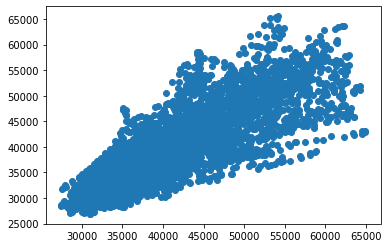

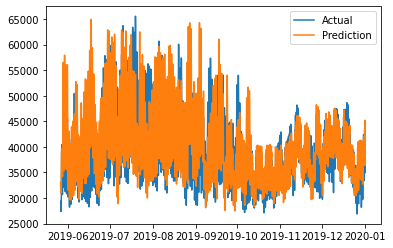

In [9]:
plt.scatter(prediction, Y_test)
plt.figure()
plt.plot(testTime, Y_test)
plt.plot(testTime, prediction)
plt.legend(['Actual', 'Prediction'])
